In [1]:
from loguru import logger
from sqlmodel import Session, create_engine, SQLModel, select
from pathlib import Path
from models.sql_models import Author, Post, Tag, Blog
import matplotlib.pyplot as plt
import numpy as np

In [2]:
base_path = Path().resolve().parent
sqlite_file_name = "database.db"
sqlite_url = f"sqlite:///{base_path}/database/data/{sqlite_file_name}"
engine = create_engine(sqlite_url)

In [3]:
all_processed_tags: list[Tag] = []
all_posts: list[Post] = []
all_blogs: list[Blog] = []
all_german_posts: list[Post] = []
all_authors: list[Author] = []

with Session(engine) as session:
        statement = select(Tag).where(Tag.processed == True)
        all_processed_tags = session.exec(statement).all()
        logger.info(f'Das Programm hat: {len(all_processed_tags)} Tags überprüft.')
        statement = select(Post.ID)
        all_posts = session.exec(statement).all()
        logger.info(f'Es wurden insgesammt: {len(all_posts)} unique Posts gefunden.')
        statement = select(Blog.site_ID, Blog.cc_licence)
        all_blogs = session.exec(statement).all()
        logger.info(f'Diese wurden in: {len(all_blogs)} uniquen Blogs veröffentlicht.')
        statement = select(Post.ID, Post.language).where(Post.language == 'de')
        all_german_posts = session.exec(statement).all()
        logger.info(f'Als deutsch erkannt, wurden: {len(all_german_posts)} Posts.')
        statement = select(Author.ID)
        all_authors = session.exec(statement).all()
        logger.info(f'Zu den Posts sind: {len(all_authors)} unique Authoren gefunden worden (nicht für alle Posts sind Authoren bekannt).')



2025-04-01 12:01:23.188 | INFO     | __main__:<module>:10 - Das Programm hat: 66041 Tags überprüft.
2025-04-01 12:01:23.831 | INFO     | __main__:<module>:13 - Es wurden insgesammt: 457866 unique Posts gefunden.
2025-04-01 12:01:23.847 | INFO     | __main__:<module>:16 - Diese wurden in: 11339 uniquen Blogs veröffentlicht.
2025-04-01 12:01:25.035 | INFO     | __main__:<module>:19 - Als deutsch erkannt, wurden: 371841 Posts.
2025-04-01 12:01:25.045 | INFO     | __main__:<module>:22 - Zu den Posts sind: 12589 unique Authoren gefunden worden (nicht für alle Posts sind Authoren bekannt).


In [4]:
all_english_posts: list[Post] = []
all_other_posts: list[Post] = []

with Session(engine) as session:
        statement = select(Post.ID, Post.language).where(Post.language == 'en')
        all_english_posts = session.exec(statement).all()
        logger.info(f'Als englisch erkannt, wurden: {len(all_english_posts)} Posts.')
        statement = select(Post.ID, Post.language).where(Post.language != 'en').where(Post.language != 'de')
        all_other_posts = session.exec(statement).all()
        logger.info(f'Weder als englisch noch als deutsch erkannt, wurden: {len(all_other_posts)} Posts.')

2025-04-01 12:01:25.670 | INFO     | __main__:<module>:7 - Als englisch erkannt, wurden: 64004 Posts.
2025-04-01 12:01:26.208 | INFO     | __main__:<module>:10 - Weder als englisch noch als deutsch erkannt, wurden: 19737 Posts.


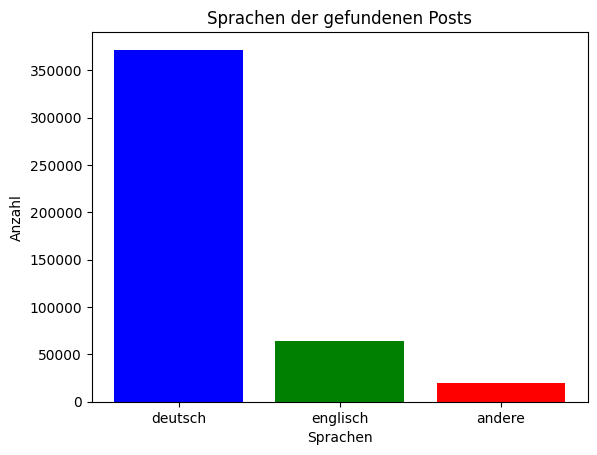

In [5]:
labels = ["deutsch", "englisch", "andere"]
werte = [len(all_german_posts), len(all_english_posts), len(all_other_posts)]
plt.bar(labels, werte, color=["blue", "green", "red"])
plt.title("Sprachen der gefundenen Posts")
plt.xlabel("Sprachen")
plt.ylabel("Anzahl")

plt.show()

In [7]:
all_cc_licence_blogs: list[Blog] = []
with Session(engine) as session:
        statement = select(Blog.cc_licence).where(Blog.cc_licence == True)
        all_cc_licence_blogs = session.exec(statement).all()
        logger.info(f'Unter einer CC-Lizenz veröffentlicht, wurden: {len(all_cc_licence_blogs)} Blogs')

2025-04-01 12:13:43.437 | INFO     | __main__:<module>:5 - Unter einer CC-Lizenz veröffentlicht, wurden: 0 Blogs
